# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [2]:
df = pd.read_csv('/Users/alvarocebrian/Documents/Formación/MS Data Scientist/8. ML with Python/Module5/Datasets/Crimes_-_2001_to_present.csv')

Get rid of any _rows_ that have nans in them:

In [3]:
df = df.dropna(axis=0, how='any')

Display the `dtypes` of your dset:

In [4]:
print(df.head(10))
print(df.dtypes)

         ID Case Number                    Date                    Block  \
0  10002677    HY191890  03/20/2015 01:13:00 PM          020XX W 70TH ST   
1  10003802    HY193541  03/21/2015 06:45:00 PM        042XX W MONROE ST   
2  10003937    HY193663  03/21/2015 07:55:00 PM     032XX W LAWRENCE AVE   
3  10004429    HY194332  03/22/2015 01:57:00 PM     019XX S ST LOUIS AVE   
4  10005837    HY195964  03/23/2015 08:40:00 PM        039XX W CERMAK RD   
5  10011726    HY200956  03/27/2015 09:10:00 AM       032XX N HARLEM AVE   
6  10012328    HY201988  03/28/2015 06:45:00 PM  005XX N SPRINGFIELD AVE   
7  10014339    HY203868  03/30/2015 02:19:00 PM     038XX W ROOSEVELT RD   
8  10016050    HY205430  03/31/2015 07:05:00 PM    060XX S PRINCETON AVE   
9  10017499    HY206880  04/01/2015 08:00:00 PM       048XX W GLADYS AVE   

   IUCR Primary Type            Description            Location Description  \
0  1661     GAMBLING              GAME/DICE                          STREET   
1  16

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [5]:
df.Date = pd.to_datetime(df.Date, errors='coerce')
print(df.dtypes)
print(df.head())

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object
         ID Case Number                Date                 Block  IUCR  \
0  10002677    HY191890 2015-03-20 13:13:00       020

In [6]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    df = df.loc[:, ['Longitude', 'Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=7)
    model.fit(df)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.6647075   41.77274636]
 [-87.75689821  41.89343087]
 [-87.63112197  41.69668372]
 [-87.68505137  41.9817429 ]
 [-87.5825671   41.7526034 ]
 [-87.70963115  41.87813286]
 [-87.6195197   41.80351964]]


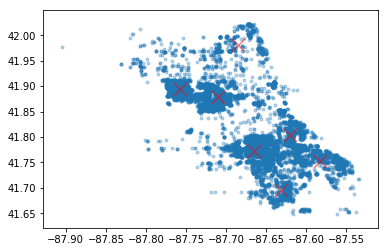

In [7]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [8]:
df = df[df.Date > '2011-01-01']

[[-87.71065977  41.87541104]
 [-87.63471101  41.70579265]
 [-87.61917907  41.79182557]
 [-87.6649696   41.7756854 ]
 [-87.68715349  41.98350221]
 [-87.75484509  41.8900059 ]
 [-87.57976236  41.75055189]]


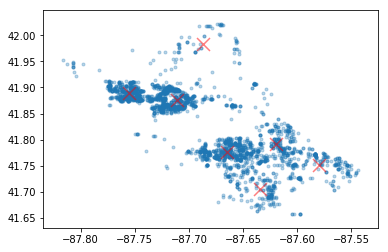

In [9]:
# Print & Plot your data
doKMeans(df)